# **DL Assignment No. 3**

3.Convolutional neural network (CNN)
• Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.

1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf # TensorFlow is used for building and training machine learning models, especially deep learning models (like neural networks).
import matplotlib.pyplot as plt
# Matplotlib is used for creating visualizations like graphs, plots, and charts.

2. Load dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
# It's a dataset of 70,000 grayscale images (28x28 pixels each) of fashion items
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# It splits the data into training and testing parts automatically.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


3. Define classes

In [15]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]


4.Preprocessing

In [16]:
train_images.shape

# 60000: This is the number of training images in the dataset.
# 28: This is the height of each image (in pixels).
# 28: This is the width of each image (in pixels).

(60000, 28, 28)

In [17]:
len(train_labels)

60000

In [18]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
test_images.shape

(10000, 28, 28)

In [20]:
len(test_labels)

10000

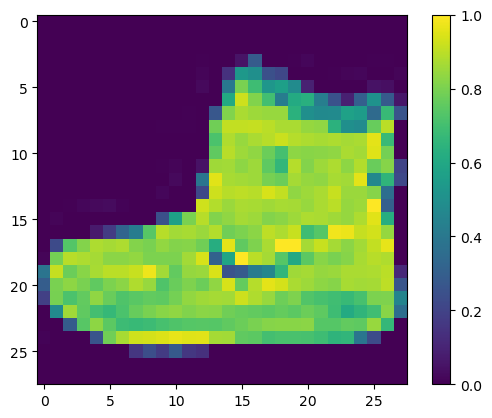

In [28]:
plt.figure()
# Initializes a new figure for plotting, allowing you to create a fresh canvas to draw on.
plt.imshow(train_images[0])
# imshow() is used to visualize the image matrix. 
plt.colorbar()
plt.grid(False)
plt.show()


In [29]:
train_images = train_images / 255.0
test_images = test_images / 255.0
# By dividing the pixel values by 255.0, we scale the pixel values to the range [0, 1]. This is very important when working with neural networks.
# This helps the network learn faster and more efficiently.



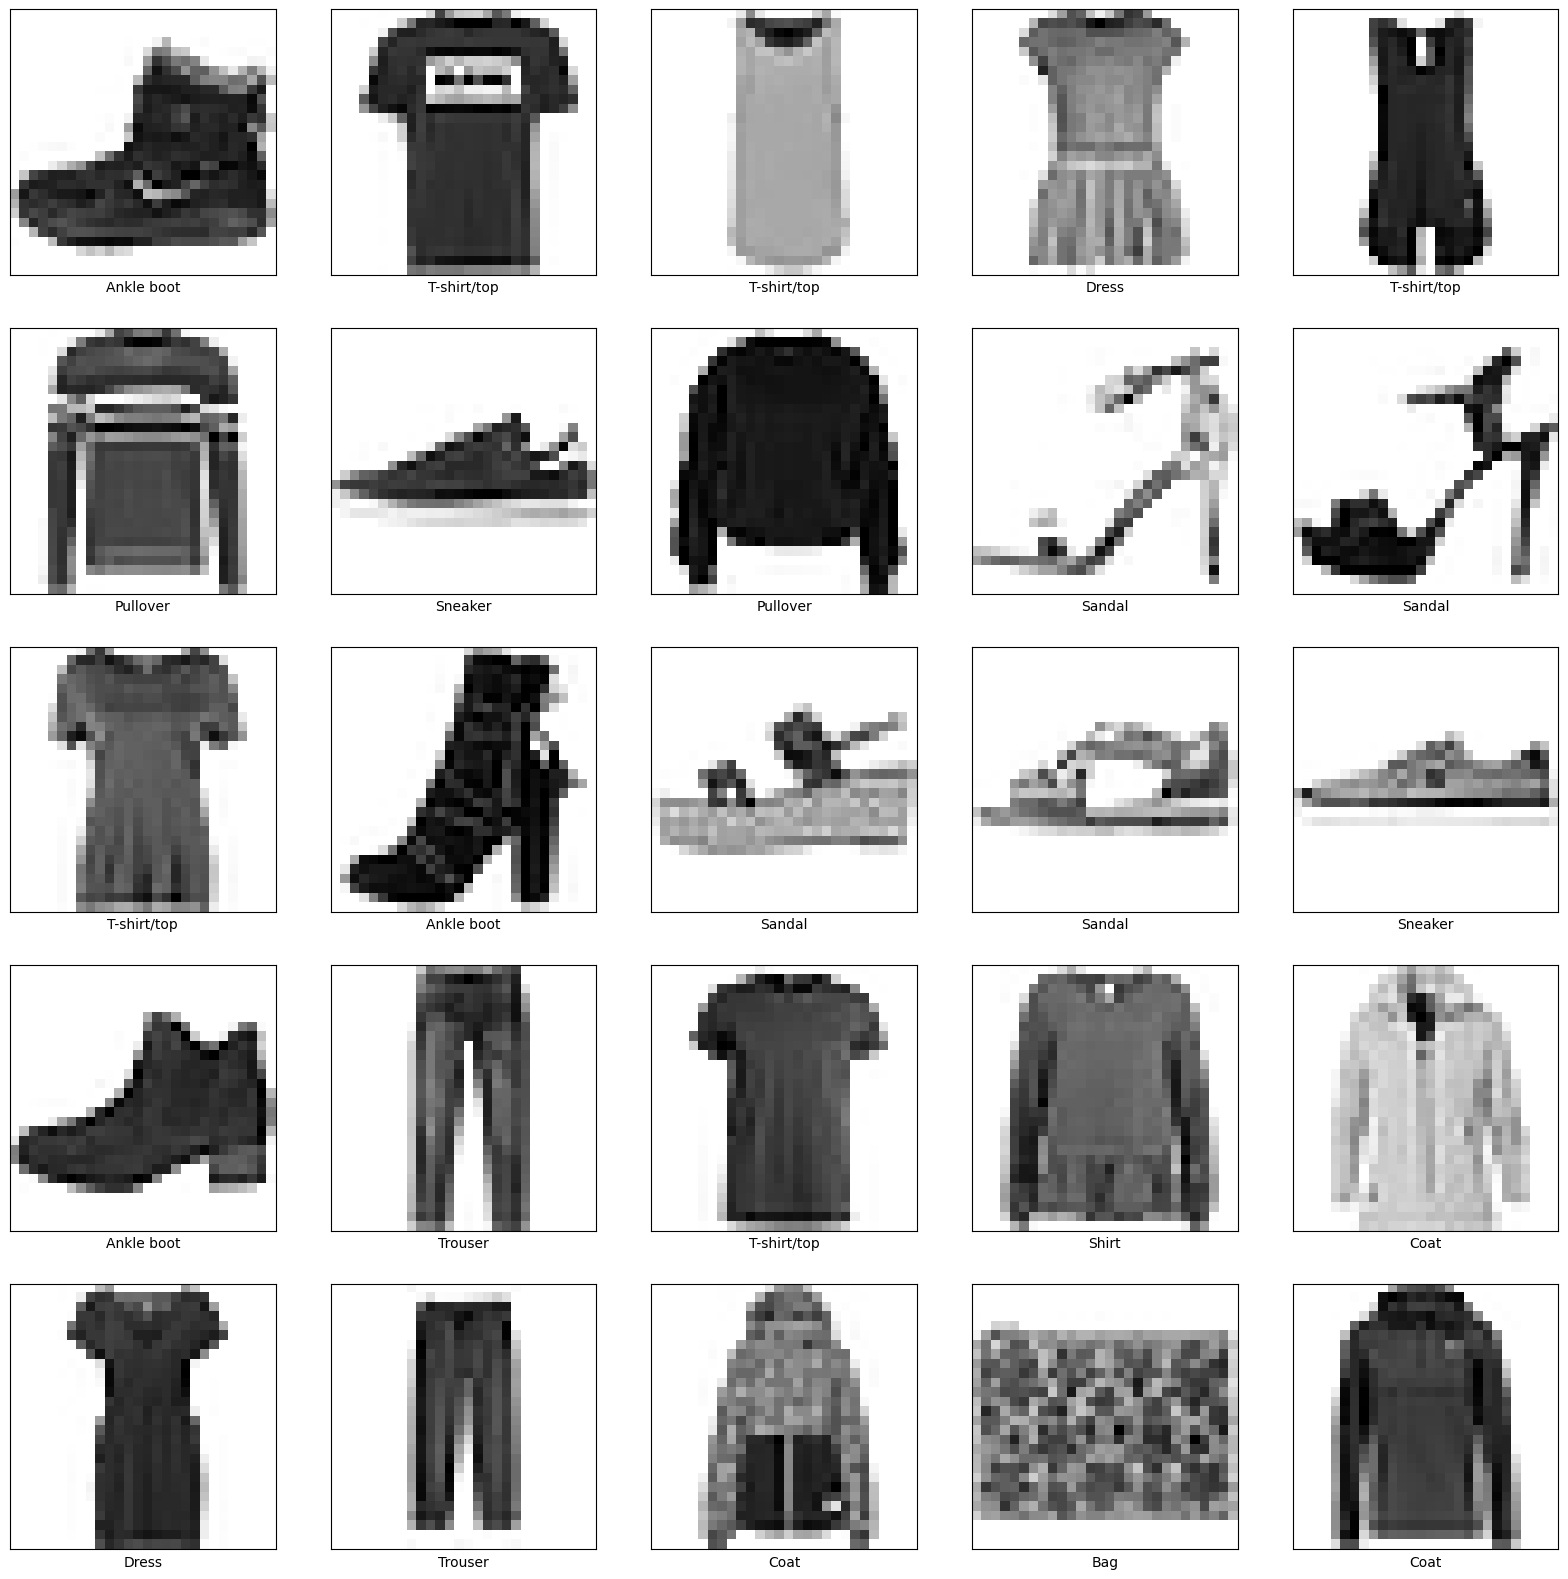

In [38]:
plt.figure(figsize=(10, 10))
# This creates a new figure with a size of 10x10 inches
for i in range(25):
    plt.subplot(5, 5, i + 1)
    # Since i starts from 0 and subplot uses a 1-based index (the first subplot is at index 1), this ensures that the first subplot will be at index 1, the second subplot at index 2, and so on, up to 25.
    plt.xticks([])
    plt.yticks([])
    # These functions remove the tick marks on the x-axis and y-axis, making the plot cleaner by not showing the numerical values.
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


5.Model Building & Evaluation

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
# tf.keras.Sequential([...]):
# A Sequential model is a linear stack of layers, meaning that each layer has exactly one input and one output.
# It is a simple way to build a neural network where the data flows through the layers one by one.
# tf.keras.layers.Flatten(input_shape=(28, 28)):
# This layer flattens the 2D input (28x28 image) into a 1D vector.
# Each image in the Fashion MNIST dataset is 28x28 pixels, so this layer takes the 2D image and flattens 
# it into a vector of length 784 (28 * 28 = 784).
# The input_shape=(28, 28) specifies that the input images have a shape of 28x28.
# tf.keras.layers.Dense(128, activation='relu'):
# This is a fully connected layer (also called a Dense layer).
# 128 is the number of neurons (or units) in this layer. So, this layer has 128 neurons.
# activation='relu' applies the ReLU (Rectified Linear Unit) activation function. ReLU outputs the input directly
# if it is positive; otherwise, it outputs zero. This introduces non-linearity into the model and helps it learn complex patterns.
# tf.keras.layers.Dense(10):
# This is another fully connected (Dense) layer.
# 10 is the number of output neurons in this layer. Since we have 10 classes in the Fashion MNIST dataset (T-shirt, Trouser, Pullover, etc.),
# this layer has 10 output neurons, one for each class.
# No activation function is specified for this layer, which means the outputs will be raw logits (real numbers) that will
# later be passed to a softmax function during the loss calculation or in the output layer.
# Visualizing the Network:
# Your model is now a simple Feedforward Neural Network (FNN) with the following architecture:
# Flatten Layer: Takes the input 28x28 image and converts it into a 784-element vector.
# Dense Layer 1: 128 neurons, with ReLU activation, producing 128 outputs.
# Dense Layer 2: 10 neurons, representing the 10 possible classes (each corresponding to a specific item in the Fashion MNIST dataset).

In [14]:
model.fit(train_images, train_labels, epochs=30)
# The model starts with random weights.
# In each epoch, the model makes predictions on the train_images and compares those predictions to the true labels (train_labels).
# It then computes the loss (a measure of error) and uses an optimization algorithm (like SGD, Adam, etc.) to update the weights in order to reduce this loss.
# Over the course of 30 epochs, the model should get better at predicting the correct label for each image.

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7763 - loss: 0.6428
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8607 - loss: 0.3873
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8775 - loss: 0.3335
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8845 - loss: 0.3140
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8935 - loss: 0.2900
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8974 - loss: 0.2770
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9026 - loss: 0.2640
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9045 - loss: 0.2529
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9085 - loss: 0.2434
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9132 - loss: 0.2329
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9157 - loss: 0.2255
Epoch 12/30
1875/1875 ━━━━━━━━

In [44]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0969 - loss: 8.7667

Test accuracy: 0.10000000149011612

Test loss: 8.770238876342773


6.Prediction and Visualization

In [46]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [47]:
print(predictions[0])

[1.93715375e-03 3.00326207e-07 6.42022409e-04 1.17097596e-04
 4.84714928e-06 9.94953334e-01 2.23047961e-03 1.02246697e-04
 1.25195311e-05 7.34262384e-09]


In [48]:
print(np.argmax(predictions[0]))
# returns the index of the highest probability for each image, which corresponds to the predicted class.

5


In [49]:
print(test_labels[0])

9


In [50]:
# This function plot_image() is designed to display a single test image along with:

# Its predicted class name

# The prediction confidence (as a percentage)

# The true class name

# Color-coded label to indicate if the prediction is correct (blue) or wrong (red)

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)


In [52]:
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


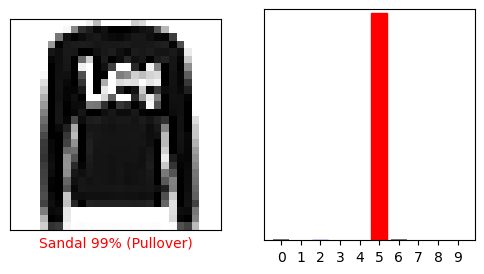

In [54]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


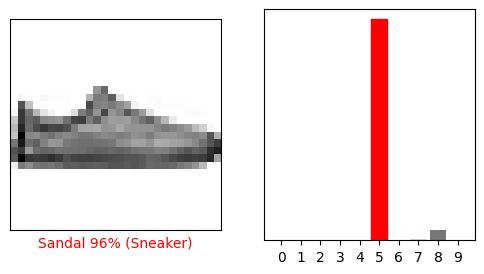

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()


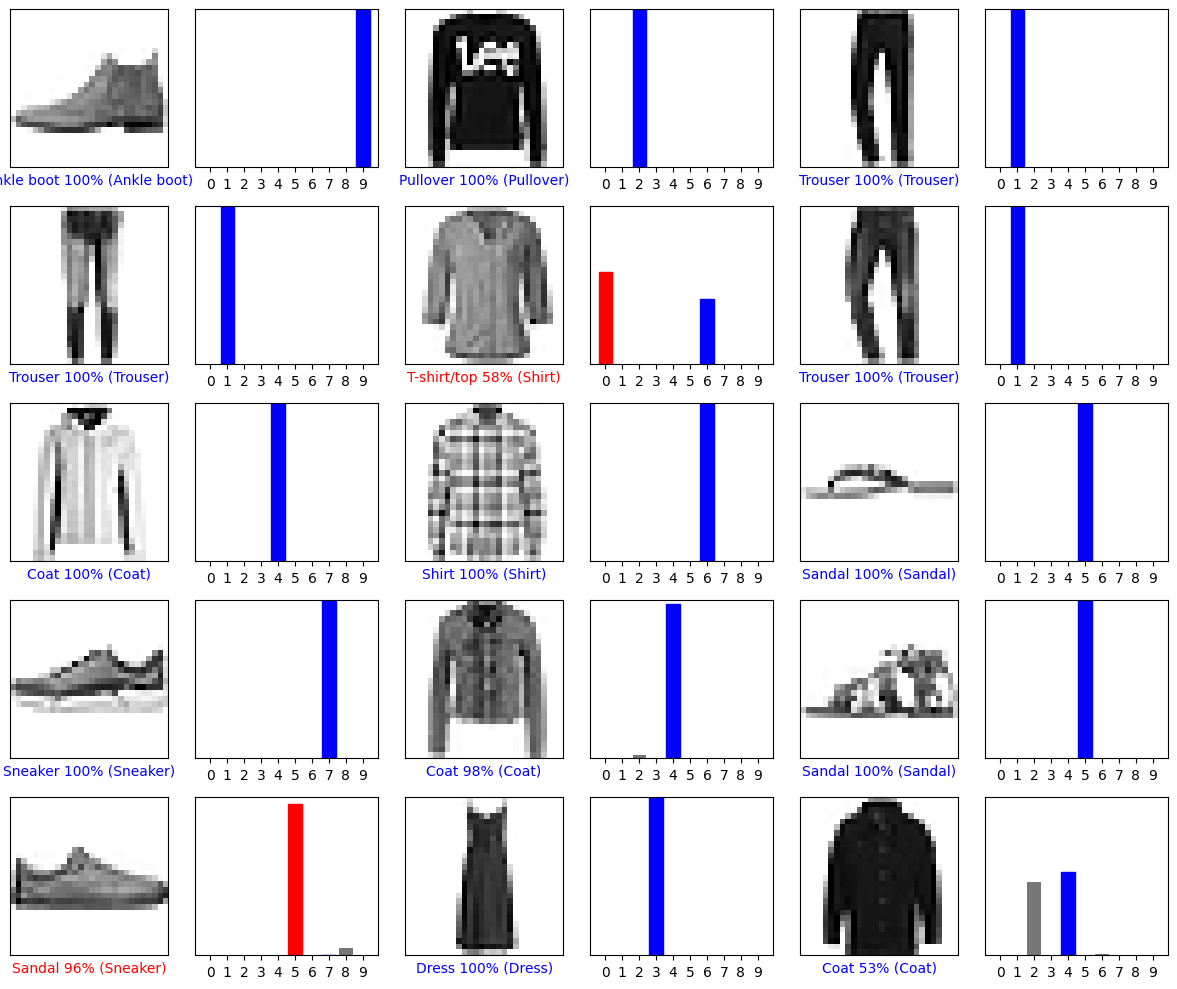

In [28]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)

plt.tight_layout()
plt.show()


In [29]:
img = test_images[1]
print(img.shape)

(28, 28)


In [30]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [31]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[1.5279358e-05 1.2669025e-24 9.9766016e-01 2.0412609e-18 2.3238936e-03
  4.0605760e-15 7.2607344e-07 1.8091010e-23 9.7223280e-15 2.1545779e-19]]


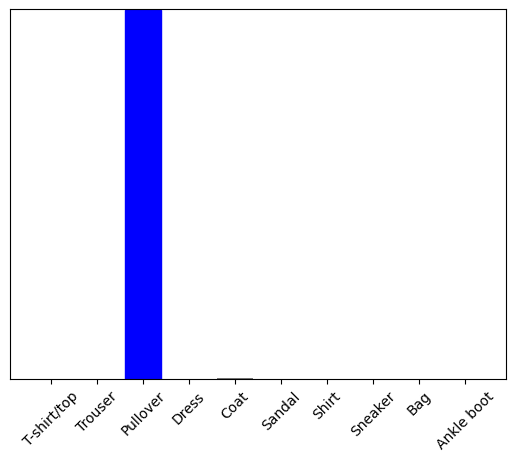

In [32]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [34]:
print(np.argmax(predictions_single[0]))

2
